## 필요 라이브러리

In [17]:
import os
import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
from collections import Counter
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
os.chdir('C:/Users/user/Desktop/잡/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/03_SNS데이터(와이즈넛)')
# 폰트 설정
mpl.rc('font', family= 'Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 데이터 작업 실시

##### 1. 데이터 호출 

In [4]:
sns_data=pd.read_csv('2020 bigcontest data_wisenut.csv',sep='',encoding='utf-8')

In [5]:
sns_data.head(5)

,SEQ,GU_CD,GU_NM(삭제),DONG_CD,DONG_NM(삭제),NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,...,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,140,서울 중구,520,소공동,4,6,16,34,26,...,24,0,7,11,186,5,1,6,0,10
1,2,140,서울 중구,540,회현동,4,0,8,27,15,...,27,17,49,1,63,251,0,58,0,71
2,3,140,서울 중구,550,명동,6,16,29,44,162,...,35,46,34,74,226,137,17,84,22,326
3,4,140,서울 중구,570,필동,0,1,5,24,2,...,24,0,1,17,162,14,0,46,22,37
4,5,140,서울 중구,580,장충동,13,8,13,34,20,...,8,17,0,0,199,12,5,0,22,125


##### 2. 데이터 전처리 작업 실시

In [6]:
sns_data['SI']=sns_data['GU_NM(삭제)'].apply(lambda x : x[:2])
sns_data.head(5)

,SEQ,GU_CD,GU_NM(삭제),DONG_CD,DONG_NM(삭제),NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,NEWS_CNT_202002,...,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005,SI
0,1,140,서울 중구,520,소공동,4,6,16,34,26,...,0,7,11,186,5,1,6,0,10,서울
1,2,140,서울 중구,540,회현동,4,0,8,27,15,...,17,49,1,63,251,0,58,0,71,서울
2,3,140,서울 중구,550,명동,6,16,29,44,162,...,46,34,74,226,137,17,84,22,326,서울
3,4,140,서울 중구,570,필동,0,1,5,24,2,...,0,1,17,162,14,0,46,22,37,서울
4,5,140,서울 중구,580,장충동,13,8,13,34,20,...,17,0,0,199,12,5,0,22,125,서울


In [7]:
col=sns_data.columns
col=col.drop('SI')
col=col.insert(1,'SI')
sns_data=sns_data[col]
col=list(col)
col[-1]=col[-1][:19]
sns_data.columns=col

In [8]:
sns_data.head()

,SEQ,SI,GU_CD,GU_NM(삭제),DONG_CD,DONG_NM(삭제),NEWS_CNT_201902,NEWS_CNT_201903,NEWS_CNT_201904,NEWS_CNT_201905,...,UP5_NEGATIVE_202004,UP5_NEGATIVE_202005,UP6_NEGATIVE_201902,UP6_NEGATIVE_201903,UP6_NEGATIVE_201904,UP6_NEGATIVE_201905,UP6_NEGATIVE_202002,UP6_NEGATIVE_202003,UP6_NEGATIVE_202004,UP6_NEGATIVE_202005
0,1,서울,140,서울 중구,520,소공동,4,6,16,34,...,24,0,7,11,186,5,1,6,0,10
1,2,서울,140,서울 중구,540,회현동,4,0,8,27,...,27,17,49,1,63,251,0,58,0,71
2,3,서울,140,서울 중구,550,명동,6,16,29,44,...,35,46,34,74,226,137,17,84,22,326
3,4,서울,140,서울 중구,570,필동,0,1,5,24,...,24,0,1,17,162,14,0,46,22,37
4,5,서울,140,서울 중구,580,장충동,13,8,13,34,...,8,17,0,0,199,12,5,0,22,125


##### 3. 워드클라우드 작업 실시

In [9]:
news_cnt=sns_data.iloc[:,[1,3,5,6,7,8,9,10,11,12,13]]
news_col=list(news_cnt.columns)
for i in range(3,len(news_col)):
    news_col[i]=news_col[i][9:]
news_cnt.columns=news_col
news_cnt.head(5)

,SI,GU_NM(삭제),DONG_NM(삭제),201902,201903,201904,201905,202002,202003,202004,202005
0,서울,서울 중구,소공동,4,6,16,34,26,3,9,8
1,서울,서울 중구,회현동,4,0,8,27,15,25,5,10
2,서울,서울 중구,명동,6,16,29,44,162,45,38,33
3,서울,서울 중구,필동,0,1,5,24,2,25,17,5
4,서울,서울 중구,장충동,13,8,13,34,20,2,17,3


In [10]:
blog_cnt=sns_data.iloc[:,[1,3,5,14,15,16,17,18,19,20,21]]
blog_col=list(blog_cnt.columns)

for i in range(3,len(blog_col)):
    blog_col[i]=blog_col[i][9:]
blog_cnt.columns=blog_col
blog_cnt.head(5)

,SI,GU_NM(삭제),DONG_NM(삭제),201902,201903,201904,201905,202002,202003,202004,202005
0,서울,서울 중구,소공동,139,595,810,398,212,152,94,196
1,서울,서울 중구,회현동,230,512,789,508,226,319,121,320
2,서울,서울 중구,명동,499,1300,1633,1092,520,695,259,589
3,서울,서울 중구,필동,186,506,747,680,142,216,77,246
4,서울,서울 중구,장충동,213,694,886,326,287,345,104,458


In [44]:
cafe_cnt=sns_data.iloc[:,[1,3,5,22,23,24,25,26,27,28,29]]
cafe_col=list(cafe_cnt.columns)
for i in range(3,len(cafe_col)):
    cafe_col[i]=cafe_col[i][9:]
cafe_cnt.columns=cafe_col
cafe_cnt.head(5)

,SI,GU_NM(삭제),DONG_NM(삭제),201902,201903,201904,201905,202002,202003,202004,202005
0,서울,서울 중구,소공동,13,1,76,80,289,122,102,6
1,서울,서울 중구,회현동,16,46,87,73,295,134,126,9
2,서울,서울 중구,명동,70,119,186,114,368,233,159,567
3,서울,서울 중구,필동,13,57,60,71,280,127,71,0
4,서울,서울 중구,장충동,13,51,66,84,351,165,142,60


In [12]:
topic=sns_data.iloc[:,[1,3,5,30,31,32,33,34,35,36,37]] #월별 동별 SNS 단어 데이터
topic_col=list(topic.columns)
for i in range(3,len(topic_col)):
    topic_col[i]=topic_col[i][9:]
topic.columns=topic_col
topic.head(5)

,SI,GU_NM(삭제),DONG_NM(삭제),201902,201903,201904,201905,202002,202003,202004,202005
0,서울,서울 중구,소공동,"장관,기념식,창간,롯데호텔,뷔페","총동창회,서울대,박물관,월드비전,프로그램","기생충,반민특위,강원도,이재민,푯돌","동계올림픽,은퇴,여제,기자회견,눈물","롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자","직원,롯데호텔,콜센터,코로나,확진자","도시계획위원회,정비계획,재개발구역,서소문,정비수법","창조인상,생명과학부,예술감독,코로나19,RNA"
1,서울,서울 중구,회현동,"회현동,서울역,도시재생,윤동주,일제강점기","남산,케이블카,남산둘레길,국립극장,남산타워","서울지방경찰청,경복궁역,종교교회,용비어천가,종로구","저작권,녹색교통지역,기부채납,최고,인지","남산,남촌,중림,고도제한,개발제한","코로나19,남산둘레길,기부 행렬,랜드마크,남녀노소","코로나19,구조조정,산업단지,원장,각하","시민아파트,시범아파트,서울시장,충정아파트,회현"
2,서울,서울 중구,명동,"생활유산,열쇠고리,신세계백화점,리뉴얼,관광객","문화재,도시재생사업,을지로,등록문화재,보존","반민특위,푯돌,충무로,생활형숙박시설,하늘N","중구,문화예술인,문화도시,쓰레기,미화원","롯데백화점,코로나바이러스감염증,관광객,소상공인,확진자","확진자,중구,코로나,숙박시설,중국인","학원,코로나,확진자,집단감염,유흥업소","마스크,선별진료소,면마스크,천마스크,확진환자"
3,서울,서울 중구,필동,"저작권,영남상생포럼,자유한국장,지적,그랜드호텔","저작권,다가구주택,주주총회,주식회사,보증금","저작권,등록,기간,매각,유산","비용,주소,등록,신용불량자,유산","인테리어,도배장판,업체,거실,비용","케이블카,남산둘레길,남산타워,국립극장,남산","코로나,업종,감소율,자영업자,재난","코로나19,본점,주류,리스,양도"
4,서울,서울 중구,장충동,"빵집,태극당,신라호텔,세관,감사원","프로포폴,호텔신라,이부진,투약,불법","신부,예비신랑,신라호텔,대학병원,결혼식","덴마크,왕세자,명예시민증,왕세자비,신라호텔","호텔신라,한옥호텔,착공,전통호텔,도시계획위원회","호텔신라,이부진,신라면세점,신라호텔,착공","코로나,업종,감소율,자영업자,재난","코로나,신세계조선호텔,브랜드,한옥호텔,특급호텔"


In [14]:
topic_1=topic+','
topic_2=topic_1.groupby('GU_NM(삭제)').sum().drop(['SI','DONG_NM(삭제)'],axis=1)
topic_2['201902']=topic_2['201902']+topic_2['201903']+topic_2['201904']+topic_2['201905']
topic_2.drop(['201903','201904','201905'],inplace=True,axis=1)
topic_2['202002']=topic_2['202002']+topic_2['202003']+topic_2['202004']+topic_2['202005']
topic_2.drop(['202003','202004','202005'],inplace=True,axis=1)
topic_2

,201902,202002
GU_NM(삭제),,
"대구 수성구,","고령성주칠곡,정치자금법,자유한국당,영남상생포럼,그랜드호텔,중기중앙회,아양아트센터,아...","확진자,코로나19,음압병실,청정지역,폐렴,확진자,코로나19,신천지,어린이집,격리,코..."
"대구 중구,","소녀상,위안부,국채보상운동기념공원,아트스페이스,두류정수장,민간위탁,도서관,공공도서관...","응급실,코로나,특별재난지역,마스크,신천지,코로나,응급실,폐쇄,경북대병원,자가격리,신..."
"서울 노원구,","노원구청장,노원구,도봉운전면허시험장,불암산,힐링타운,플레이스,해링턴,태릉,서울경제,...","상승폭,광운대역세권,코레일,풍선효과,코로나19,돗가비,코로나19,확진자,주거환경,자..."
"서울 중구,","장관,기념식,창간,롯데호텔,뷔페,회현동,서울역,도시재생,윤동주,일제강점기,생활유산,...","롯데백화점,마포공덕점,프레지던트호텔,코로나바이러스,확진자,남산,남촌,중림,고도제한,..."


In [32]:
a1=Counter(topic_2.iloc[0,0].split(',')[:-1])
a2=Counter(topic_2.iloc[1,0].split(',')[:-1])
a3=Counter(topic_2.iloc[2,0].split(',')[:-1])
a4=Counter(topic_2.iloc[3,0].split(',')[:-1])

b1=Counter(topic_2.iloc[0,1].split(',')[:-1])
b2=Counter(topic_2.iloc[1,1].split(',')[:-1])
b3=Counter(topic_2.iloc[2,1].split(',')[:-1])
b4=Counter(topic_2.iloc[3,1].split(',')[:-1])

wordcloud = WordCloud(font_path='C:/Windows/Fonts/맑은 고딕/malgun.ttf',background_color='white')

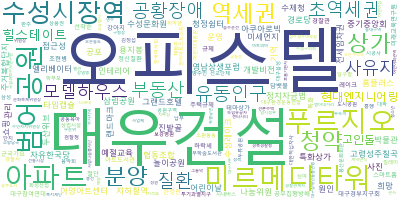

In [33]:
df=pd.DataFrame(a1.keys(),columns=['word'])
df_1=pd.DataFrame(a1.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #대구 수성구 2019


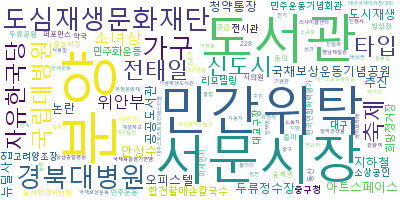

In [34]:
df=pd.DataFrame(a2.keys(),columns=['word'])
df_1=pd.DataFrame(a2.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #대구 중구 2019

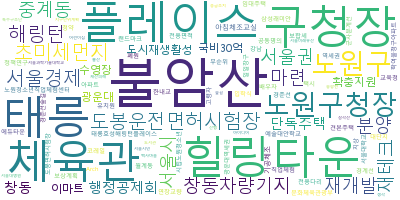

In [35]:
df=pd.DataFrame(a3.keys(),columns=['word'])
df_1=pd.DataFrame(a3.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #서울 중구 2019

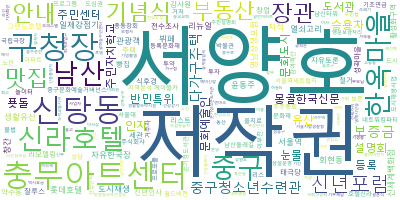

In [36]:
df=pd.DataFrame(a4.keys(),columns=['word'])
df_1=pd.DataFrame(a4.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #서울 노원구 2019

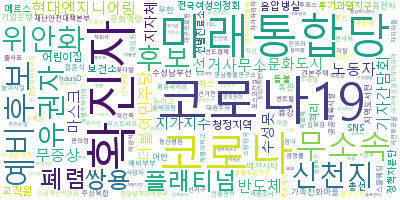

In [37]:
df=pd.DataFrame(b1.keys(),columns=['word'])
df_1=pd.DataFrame(b1.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #대구 수성구 2019

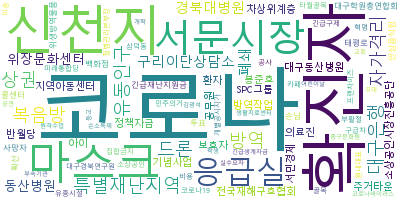

In [38]:
df=pd.DataFrame(b2.keys(),columns=['word'])
df_1=pd.DataFrame(b2.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #대구 중구 2019

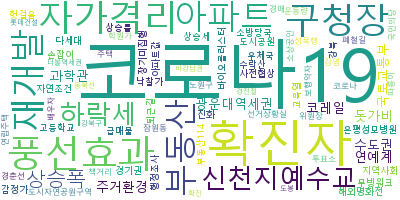

In [39]:
df=pd.DataFrame(b3.keys(),columns=['word'])
df_1=pd.DataFrame(b3.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #서울 중구 2019

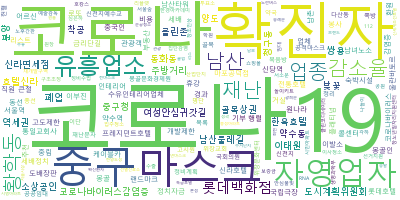

In [40]:
df=pd.DataFrame(b4.keys(),columns=['word'])
df_1=pd.DataFrame(b4.values(),columns=['count'])
df=pd.concat([df,df_1],axis=1)
count=list(zip(df['word'],df['count']))
wordcloud.generate_from_frequencies(dict(count)).to_image() #서울 노원구 2019

##### 열 이름 변경 작업 진행

In [41]:
code=['숙박','레저업소','문화취미','의료기관','보건위생','요식업소']
positive_cnt=sns_data.iloc[:,[1,3,5]+[i for i in range(38,86)]]
positive_col=list(positive_cnt.columns)
for i in range(3,len(positive_col)):
    positive_col[i]=code[int(positive_col[i][2])-1]+'-'+positive_col[i][13:]
positive_cnt.columns=positive_col
positive_cnt.head(5)

,SI,GU_NM(삭제),DONG_NM(삭제),숙박-201902,숙박-201903,숙박-201904,숙박-201905,숙박-202002,숙박-202003,숙박-202004,...,보건위생-202004,보건위생-202005,요식업소-201902,요식업소-201903,요식업소-201904,요식업소-201905,요식업소-202002,요식업소-202003,요식업소-202004,요식업소-202005
0,서울,서울 중구,소공동,5,111,113,132,69,7,22,...,0,316,16,45,100,69,51,26,0,301
1,서울,서울 중구,회현동,13,61,138,3,4,2,98,...,0,322,330,13,164,795,46,222,2,356
2,서울,서울 중구,명동,106,356,699,334,90,84,215,...,26,384,528,466,351,622,151,537,88,669
3,서울,서울 중구,필동,32,60,2,195,0,6,0,...,0,316,284,109,52,133,6,237,19,304
4,서울,서울 중구,장충동,29,140,363,90,41,27,97,...,0,316,45,25,60,27,13,7,22,492


In [42]:
negative_cnt=sns_data.iloc[:,[1,3,5]+[i for i in range(86,134)]]
negative_col=list(negative_cnt.columns)
for i in range(3,len(negative_col)):
    negative_col[i]=code[int(negative_col[i][2])-1]+'-'+negative_col[i][13:]
negative_cnt.columns=negative_col
negative_cnt.head(5)

,SI,GU_NM(삭제),DONG_NM(삭제),숙박-201902,숙박-201903,숙박-201904,숙박-201905,숙박-202002,숙박-202003,숙박-202004,...,보건위생-202004,보건위생-202005,요식업소-201902,요식업소-201903,요식업소-201904,요식업소-201905,요식업소-202002,요식업소-202003,요식업소-202004,요식업소-202005
0,서울,서울 중구,소공동,0,0,10,16,51,13,2,...,24,0,7,11,186,5,1,6,0,10
1,서울,서울 중구,회현동,12,0,0,0,0,0,0,...,27,17,49,1,63,251,0,58,0,71
2,서울,서울 중구,명동,93,17,39,34,81,96,21,...,35,46,34,74,226,137,17,84,22,326
3,서울,서울 중구,필동,7,0,1,0,0,0,0,...,24,0,1,17,162,14,0,46,22,37
4,서울,서울 중구,장충동,9,13,9,3,25,5,5,...,8,17,0,0,199,12,5,0,22,125


##### 월별 뉴스, 블로그, 카페 게시량  _ 구 총합

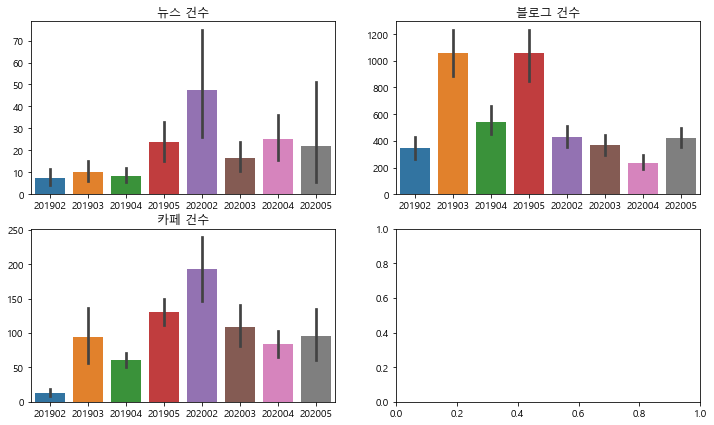

In [45]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,7)
sns.barplot(data=news_cnt,ax=axes[0][0])
axes[0][0].set(title='뉴스 건수')

sns.barplot(data=blog_cnt,ax=axes[0][1])
axes[0][1].set(title='블로그 건수')

sns.barplot(data=cafe_cnt,ax=axes[1][0])
axes[1][0].set(title='카페 건수')

plt.show()

##### 구별로 구분해놓은 그래프_ "월별 뉴스, 블로그, 카페 게시량 총합"

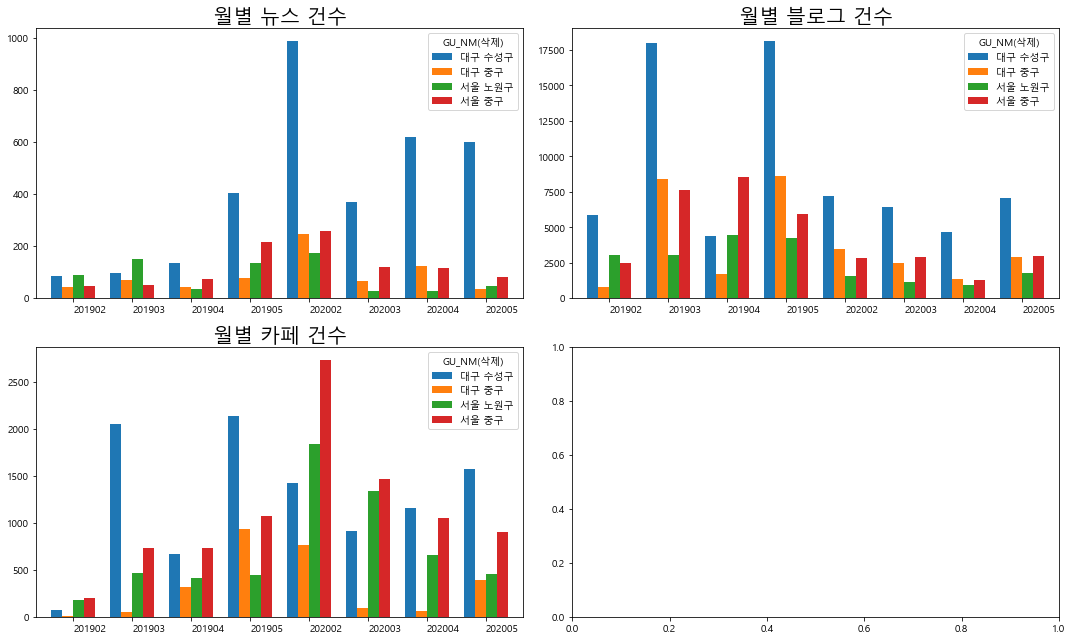

In [46]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,9)

news_cnt_1=news_cnt.iloc[:,1:].drop('DONG_NM(삭제)',axis=1)
news_cnt_1=news_cnt_1.groupby('GU_NM(삭제)').sum().T
news_cnt_1.plot(kind='bar',width=0.75,ax=axes[0][0])
plt.setp(axes[0][0].get_xticklabels(), rotation=0, ha='left')
axes[0][0].set_title('월별 뉴스 건수',size=20)

blog_cnt_1=blog_cnt.iloc[:,1:].drop('DONG_NM(삭제)',axis=1)
blog_cnt_1=blog_cnt_1.groupby('GU_NM(삭제)').sum().T
blog_cnt_1.plot(kind='bar',width=0.75,ax=axes[0][1])
plt.setp(axes[0][1].get_xticklabels(), rotation=0, ha='left')
axes[0][1].set_title('월별 블로그 건수',size=20)

cafe_cnt_1=cafe_cnt.iloc[:,1:].drop('DONG_NM(삭제)',axis=1)
cafe_cnt_1=cafe_cnt_1.groupby('GU_NM(삭제)').sum().T
cafe_cnt_1.plot(kind='bar',width=0.75,ax=axes[1][0])
plt.setp(axes[1][0].get_xticklabels(), rotation=0, ha='left')
axes[1][0].set_title('월별 카페 건수',size=20)

plt.tight_layout()
plt.show()

##### "월별 뉴스, 블로그, 카페 게시량 총합"_ Area그래프로 표현

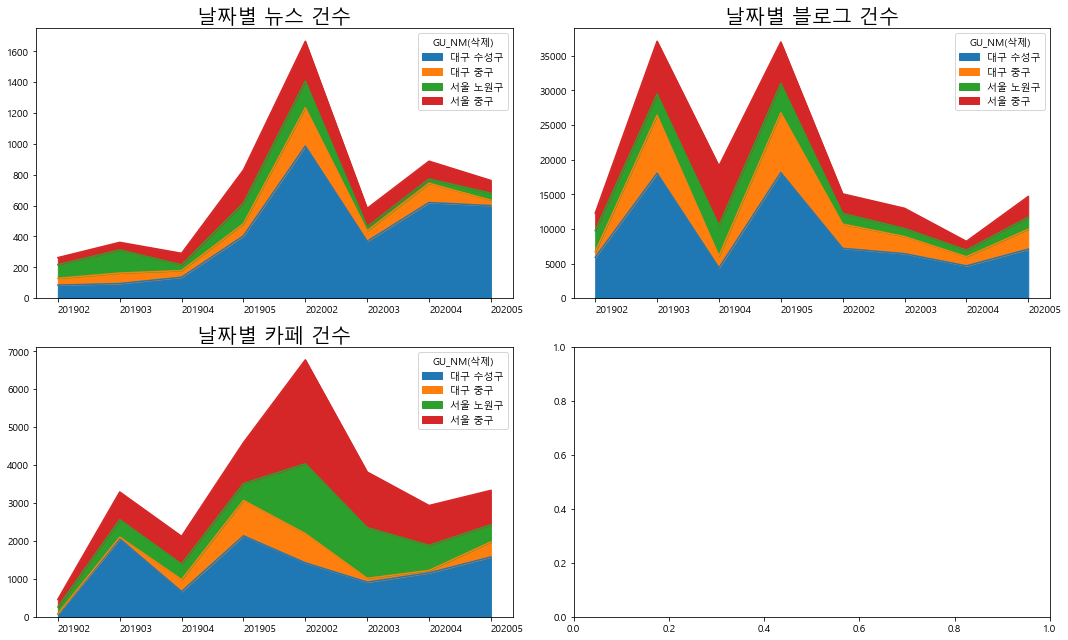

In [47]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,9)

news_cnt_1=news_cnt.iloc[:,1:].drop('DONG_NM(삭제)',axis=1)
news_cnt_1=news_cnt_1.groupby('GU_NM(삭제)').sum().T
news_cnt_1.plot(kind='area',ax=axes[0][0])
plt.setp(axes[0][0].get_xticklabels(), rotation=0, ha='left')
axes[0][0].set_title('날짜별 뉴스 건수',size=20)

blog_cnt_1=blog_cnt.iloc[:,1:].drop('DONG_NM(삭제)',axis=1)
blog_cnt_1=blog_cnt_1.groupby('GU_NM(삭제)').sum().T
blog_cnt_1.plot(kind='area',ax=axes[0][1])
plt.setp(axes[0][1].get_xticklabels(), rotation=0, ha='left')
axes[0][1].set_title('날짜별 블로그 건수',size=20)

cafe_cnt_1=cafe_cnt.iloc[:,1:].drop('DONG_NM(삭제)',axis=1)
cafe_cnt_1=cafe_cnt_1.groupby('GU_NM(삭제)').sum().T
cafe_cnt_1.plot(kind='area',ax=axes[1][0])
plt.setp(axes[1][0].get_xticklabels(), rotation=0, ha='left')
axes[1][0].set_title('날짜별 카페 건수',size=20)

plt.tight_layout()
plt.show()

##### 전체 sns에서 월별, 카테고리별 긍정 및 부정 게시량

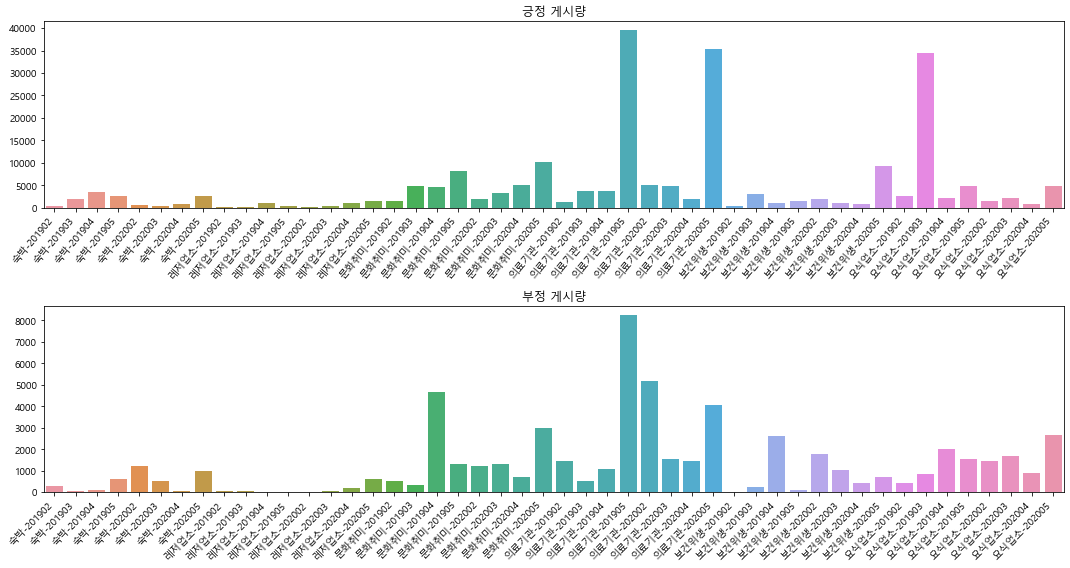

In [48]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,8)
sns.barplot(data=pd.DataFrame(positive_cnt.sum()[3:]).T,ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=50, ha='right')
axes[0].set(title='긍정 게시량')

sns.barplot(data=pd.DataFrame(negative_cnt.sum()[3:]).T,ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set(title='부정 게시량')

plt.tight_layout()
plt.show()

#### 의료기관 시각화에 필요한 전처리 작업

In [49]:
positive_cnt[['GU_NM(삭제)','의료기관-201905']].groupby('GU_NM(삭제)').sum()

,의료기관-201905
GU_NM(삭제),
대구 수성구,9091
대구 중구,10719
서울 노원구,8499
서울 중구,11214


In [50]:
negative_cnt[['GU_NM(삭제)','의료기관-201905']].groupby('GU_NM(삭제)').sum()

,의료기관-201905
GU_NM(삭제),
대구 수성구,1671
대구 중구,2161
서울 노원구,2191
서울 중구,2232


In [51]:
positive_cnt[['GU_NM(삭제)','의료기관-202002']].groupby('GU_NM(삭제)').sum()

,의료기관-202002
GU_NM(삭제),
대구 수성구,2522
대구 중구,1193
서울 노원구,946
서울 중구,464


In [52]:
negative_cnt[['GU_NM(삭제)','의료기관-202002']].groupby('GU_NM(삭제)').sum()

,의료기관-202002
GU_NM(삭제),
대구 수성구,3818
대구 중구,893
서울 노원구,158
서울 중구,302


##### 201905 동별 의료기관 긍정 게시량

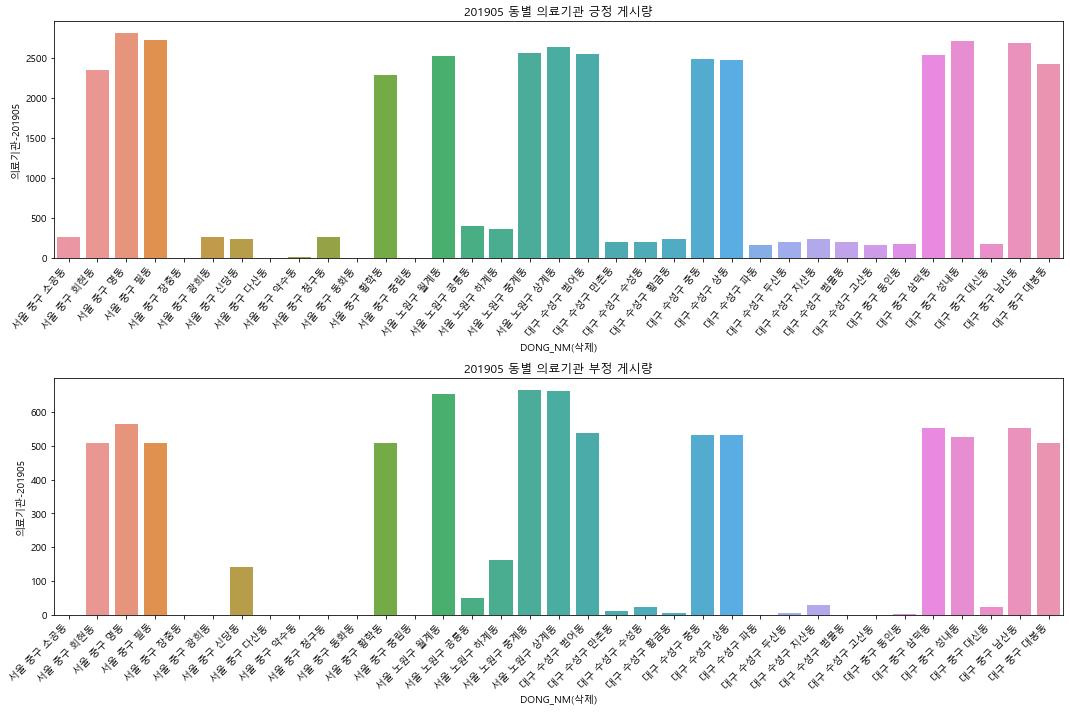

In [53]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,10)
positive_1=positive_cnt[['DONG_NM(삭제)','의료기관-201905']]
positive_1['DONG_NM(삭제)']=positive_cnt['GU_NM(삭제)']+' '+positive_1['DONG_NM(삭제)']
sns.barplot(data=positive_1,x='DONG_NM(삭제)',y='의료기관-201905',ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=50, ha='right')
axes[0].set(title='201905 동별 의료기관 긍정 게시량')

negative_1=negative_cnt[['DONG_NM(삭제)','의료기관-201905']]
negative_1['DONG_NM(삭제)']=negative_cnt['GU_NM(삭제)']+' '+negative_1['DONG_NM(삭제)']
sns.barplot(data=negative_1,x='DONG_NM(삭제)',y='의료기관-201905',ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set(title='201905 동별 의료기관 부정 게시량')

plt.tight_layout()
plt.show()

##### 201905 동별 의료기관 부정 게시량

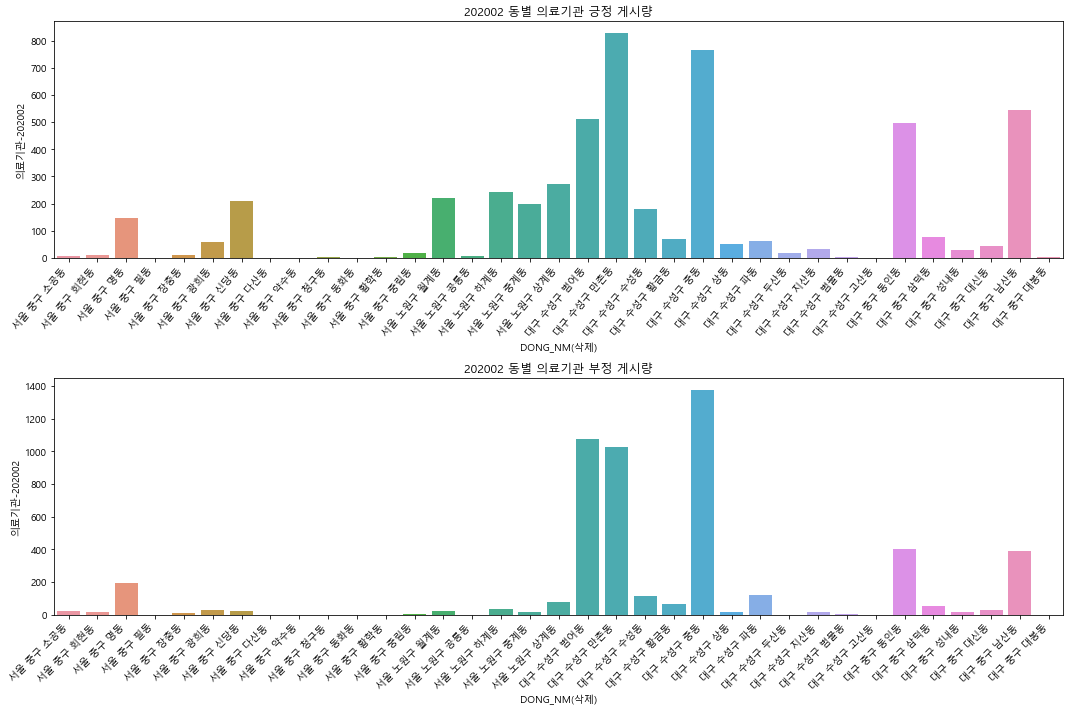

In [54]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,10)
positive_1=positive_cnt[['DONG_NM(삭제)','의료기관-202002']]
positive_1['DONG_NM(삭제)']=positive_cnt['GU_NM(삭제)']+' '+positive_1['DONG_NM(삭제)']
sns.barplot(data=positive_1,x='DONG_NM(삭제)',y='의료기관-202002',ax=axes[0])
plt.setp(axes[0].get_xticklabels(), rotation=50, ha='right')
axes[0].set(title='202002 동별 의료기관 긍정 게시량')

negative_1=negative_cnt[['DONG_NM(삭제)','의료기관-202002']]
negative_1['DONG_NM(삭제)']=negative_cnt['GU_NM(삭제)']+' '+negative_1['DONG_NM(삭제)']
sns.barplot(data=negative_1,x='DONG_NM(삭제)',y='의료기관-202002',ax=axes[1])
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set(title='202002 동별 의료기관 부정 게시량')

plt.tight_layout()
plt.show()

#####  2020년 2월 의료기관 동별 긍정 게시량

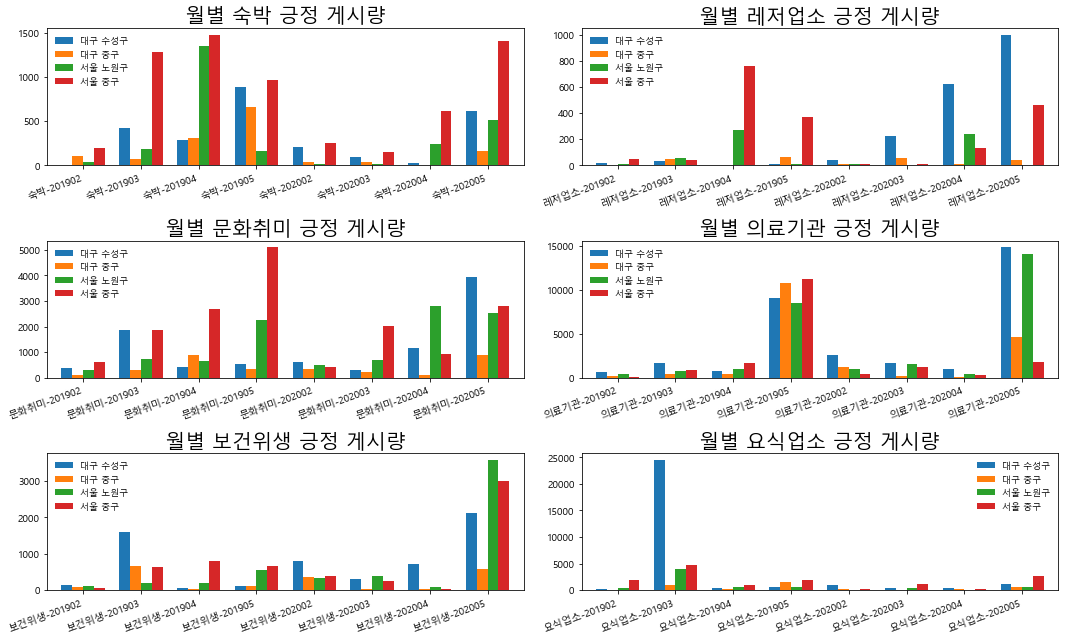

In [55]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,9)

positive_2=positive_cnt.iloc[:,[1]+[i for i in range(3,11)]].groupby('GU_NM(삭제)').sum().T
positive_2.plot(kind='bar',width=0.75,ax=axes[0][0])
plt.setp(axes[0][0].get_xticklabels(), rotation=20, ha='right')
axes[0][0].set_title('월별 숙박 긍정 게시량',size=20)
axes[0][0].legend(loc='upper left', frameon=False,fontsize=9)

positive_3=positive_cnt.iloc[:,[1]+[i for i in range(11,19)]].groupby('GU_NM(삭제)').sum().T
positive_3.plot(kind='bar',width=0.75,ax=axes[0][1])
plt.setp(axes[0][1].get_xticklabels(), rotation=20, ha='right')
axes[0][1].set_title('월별 레저업소 긍정 게시량',size=20)
axes[0][1].legend(loc='upper left', frameon=False,fontsize=9)

positive_4=positive_cnt.iloc[:,[1]+[i for i in range(19,27)]].groupby('GU_NM(삭제)').sum().T
positive_4.plot(kind='bar',width=0.75,ax=axes[1][0])
plt.setp(axes[1][0].get_xticklabels(), rotation=20, ha='right')
axes[1][0].set_title('월별 문화취미 긍정 게시량',size=20)
axes[1][0].legend(loc='upper left', frameon=False,fontsize=9)

positive_5=positive_cnt.iloc[:,[1]+[i for i in range(27,35)]].groupby('GU_NM(삭제)').sum().T
positive_5.plot(kind='bar',width=0.75,ax=axes[1][1])
plt.setp(axes[1][1].get_xticklabels(), rotation=20, ha='right')
axes[1][1].set_title('월별 의료기관 긍정 게시량',size=20)
axes[1][1].legend(loc='upper left', frameon=False,fontsize=9)

positive_6=positive_cnt.iloc[:,[1]+[i for i in range(35,43)]].groupby('GU_NM(삭제)').sum().T
positive_6.plot(kind='bar',width=0.75,ax=axes[2][0])
plt.setp(axes[2][0].get_xticklabels(), rotation=20, ha='right')
axes[2][0].set_title('월별 보건위생 긍정 게시량',size=20)
axes[2][0].legend(loc='upper left', frameon=False,fontsize=9)

positive_7=positive_cnt.iloc[:,[1]+[i for i in range(43,51)]].groupby('GU_NM(삭제)').sum().T
positive_7.plot(kind='bar',width=0.75,ax=axes[2][1])
plt.setp(axes[2][1].get_xticklabels(), rotation=20, ha='right')
axes[2][1].set_title('월별 요식업소 긍정 게시량',size=20)
axes[2][1].legend(loc='upper right', frameon=False,fontsize=9)

plt.tight_layout()
plt.show()

##### 2020년 2월 의료기관 동별 부정 게시량

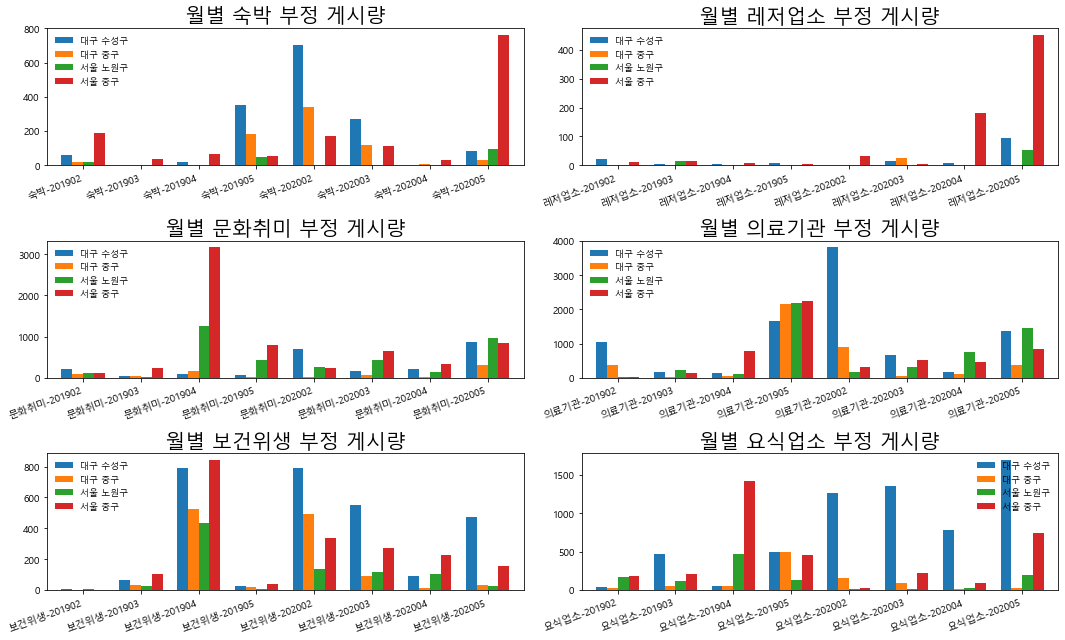

In [36]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,9)

negative_2=negative_cnt.iloc[:,[1]+[i for i in range(3,11)]].groupby('GU_NM(삭제)').sum().T
negative_2.plot(kind='bar',width=0.75,ax=axes[0][0])
plt.setp(axes[0][0].get_xticklabels(), rotation=20, ha='right')
axes[0][0].set_title('월별 숙박 부정 게시량',size=20)
axes[0][0].legend(loc='upper left', frameon=False,fontsize=9)

negative_3=negative_cnt.iloc[:,[1]+[i for i in range(11,19)]].groupby('GU_NM(삭제)').sum().T
negative_3.plot(kind='bar',width=0.75,ax=axes[0][1])
plt.setp(axes[0][1].get_xticklabels(), rotation=20, ha='right')
axes[0][1].set_title('월별 레저업소 부정 게시량',size=20)
axes[0][1].legend(loc='upper left', frameon=False,fontsize=9)

negative_4=negative_cnt.iloc[:,[1]+[i for i in range(19,27)]].groupby('GU_NM(삭제)').sum().T
negative_4.plot(kind='bar',width=0.75,ax=axes[1][0])
plt.setp(axes[1][0].get_xticklabels(), rotation=20, ha='right')
axes[1][0].set_title('월별 문화취미 부정 게시량',size=20)
axes[1][0].legend(loc='upper left', frameon=False,fontsize=9)

negative_5=negative_cnt.iloc[:,[1]+[i for i in range(27,35)]].groupby('GU_NM(삭제)').sum().T
negative_5.plot(kind='bar',width=0.75,ax=axes[1][1])
plt.setp(axes[1][1].get_xticklabels(), rotation=20, ha='right')
axes[1][1].set_title('월별 의료기관 부정 게시량',size=20)
axes[1][1].legend(loc='upper left', frameon=False,fontsize=9)

negative_6=negative_cnt.iloc[:,[1]+[i for i in range(35,43)]].groupby('GU_NM(삭제)').sum().T
negative_6.plot(kind='bar',width=0.75,ax=axes[2][0])
plt.setp(axes[2][0].get_xticklabels(), rotation=20, ha='right')
axes[2][0].set_title('월별 보건위생 부정 게시량',size=20)
axes[2][0].legend(loc='upper left', frameon=False,fontsize=9)

negative_7=negative_cnt.iloc[:,[1]+[i for i in range(43,51)]].groupby('GU_NM(삭제)').sum().T
negative_7.plot(kind='bar',width=0.75,ax=axes[2][1])
plt.setp(axes[2][1].get_xticklabels(), rotation=20, ha='right')
axes[2][1].set_title('월별 요식업소 부정 게시량',size=20)
axes[2][1].legend(loc='upper right', frameon=False,fontsize=9)

plt.tight_layout()
plt.show()